## 1. Analyzing the Wikipedia voters network [9 points]
Download the Wikipedia voting network wiki-Vote.txt.gz: http://snap.stanford.edu/
data/wiki-Vote.html.

Using one of the network analysis tools above, load the Wikipedia voting network. 

Note that Wikipedia is a directed network. Formally, we consider the Wikipedia network as a directed graph $G = (V, E)$, with node set $V$ and edge set $E ⊂ V × V$ where (edges are ordered pairs of nodes). An edge $(a, b) ∈ E$ means that user $a$ voted on user $b$.

To make our questions clearer, we will use the following small graph as a running example:
$$
Gsmall = (Vsmall, Esmall)
$$
where 
$$
Vsmall = \{1, 2, 3\}
$$ and
$$
Esmall = \{(1, 2),(2, 1),(1, 3),(1, 1)\}
$$

In [56]:
import snap

In [57]:
# Load the network
SOURCE_FILE = './data/wiki-Vote.txt'
wikiGraph = snap.LoadEdgeList(snap.PNGraph, SOURCE_FILE, 0, 1)
assert 103689 == wikiGraph.GetEdges()
assert 7115 == wikiGraph.GetNodes()

In [58]:
# 1.1
print("The number of nodes in the network is %s." % (
    wikiGraph.GetNodes()))

The number of nodes in the network is 7115.


In [59]:
# 1.2
print("The number of nodes with a self-edge is %s." % (
    snap.CntSelfEdges(wikiGraph)))

The number of nodes with a self-edge is 0.


In [60]:
# 1.3
print("The number of directed edges %s." % (
    snap.CntUniqDirEdges(wikiGraph)))

The number of directed edges 103689.


In [61]:
# 1.4
print("The number of undirected edges is %s." % (
    snap.CntUniqUndirEdges(wikiGraph)))

The number of undirected edges is 100762.


In [62]:
# 1.5
print("The number of reciprocated edges is %s." % (
    snap.CntUniqDirEdges(wikiGraph) - snap.CntUniqUndirEdges(wikiGraph)))

The number of reciprocated edges is 2927.


In [63]:
# 1.6
print("The number of nodes of zero out-degree is %s." % (
    snap.CntOutDegNodes(wikiGraph, 0)))

The number of nodes of zero out-degree is 1005.


In [64]:
# 1.7
print("The number of nodes of zero in-degree is %s." % (
    snap.CntInDegNodes(wikiGraph, 0)))

The number of nodes of zero in-degree is 4734.


In [65]:
# 1.8 
DEGREE_BOUNDARY = 10
outDegreeToCount = snap.TIntPrV()
snap.GetOutDegCnt(wikiGraph, outDegreeToCount)
numNodesLargeOutDegree = sum([item.GetVal2()
                              for item in outDegreeToCount
                              if item.GetVal1() > DEGREE_BOUNDARY])
print("The number of nodes with more than %s outgoing edges is %s." % (
    DEGREE_BOUNDARY, numNodesLargeOutDegree))

The number of nodes with more than 10 outgoing edges is 1612.


In [66]:
# 1.9
inDegreeCount = snap.TIntPrV()
snap.GetOutDegCnt(wikiGraph, inDegreeCount)
numNodesSmallInDegree = sum([item.GetVal2()
                             for item in inDegreeCount
                             if item.GetVal1() < DEGREE_BOUNDARY])
print("The number of nodes with less than %s incoming edges is %s." % (
    DEGREE_BOUNDARY, numNodesSmallInDegree))

The number of nodes with less than 10 incoming edges is 5424.


## 2 Further Analyzing the Wikiepedia voters network

In [67]:
import snap
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

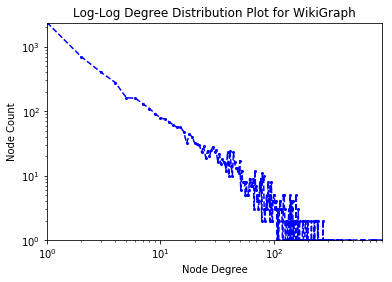

In [68]:
# 2.1: Histogram of out-degree distribution.
## Calculate degree and construct data frame.
outDegreeToCount = snap.TIntPrV()
snap.GetOutDegCnt(wikiGraph, outDegreeToCount)
data = pd.DataFrame([[item.GetVal1(), item.GetVal2()]
                     for item in outDegreeToCount
                     if item.GetVal1() > 0 and item.GetVal2() > 0])
data.columns = ['degree', 'count']

## Plot.
% matplotlib inline
fig = plt.plot(data['degree'], data['count'], 'bo--', markersize=2)[0]
fig.axes.set_xscale('log')
fig.axes.set_yscale('log')
fig.axes.set_xlim(data['degree'].min(), data['degree'].max())
fig.axes.set_ylim(data['count'].min(), data['count'].max())
fig.axes.set_title("Log-Log Degree Distribution Plot for WikiGraph")
fig.axes.set_xlabel("Node Degree")
fig.axes.set_ylabel("Node Count")

## Save image.
plt.savefig("WikiGraphOutDegreeDistribution", format='svg', dpi=600)
plt.savefig("WikiGraphOutDegreeDistribution", dpi=600)

In [69]:
# Alternative 2.1.
snap.PlotOutDegDistr(wikiGraph, "WikiGraph",
                     "WikiGraph - Out Degree Distribution")

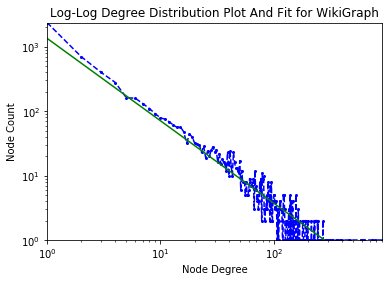

In [70]:
# 2.2: Compute and plot the least-square regression line.
## Calculate the best fit line on the log data.
DEGREE = 1
slope, intercept = np.polyfit(
    np.log10(data['degree']),np.log10(data['count']), DEGREE)
predict = lambda x: 10**(intercept)*x**slope

## Plot.
% matplotlib inline
fig = plt.plot(data['degree'], data['count'], 'bo--',
               data['degree'], predict(data['degree']), 'g',
               markersize=2)[0]
fig.axes.set_xscale('log')
fig.axes.set_yscale('log')
fig.axes.set_xlim(data['degree'].min(), data['degree'].max())
fig.axes.set_ylim(data['count'].min(), data['count'].max())
fig.axes.set_title("Log-Log Degree Distribution Plot And Fit for WikiGraph")
fig.axes.set_xlabel("Node Degree")
fig.axes.set_ylabel("Node Count")

## Save image.
plt.savefig("WikiGraphOutDegreeDistributionFit", format='svg', dpi=600)
plt.savefig("WikiGraphOutDegreeDistributionFit", dpi=600)

In [71]:
## Print the results.
print("The best fit line is given by equation "
      "log(y) = %s * log(x) + %s" % (slope, intercept))

The best fit line is given by equation log(y) = -1.28106470567 * log(x) + 3.1324547045


In [72]:
# Alternative 2.1.
snap.PlotOutDegDistr(wikiGraph, "WikiGraphFit",
                     "WikiGraph - Out Degree Distribution with Fit",
                     False, True)
print("The best fit line is given by equation "
      "log(y) = -1.411 * log(x) + 3.3583 with R^2=0.91")

The best fit line is given by equation log(y) = -1.411 * log(x) + 3.3583 with R^2=0.91


## 3 Finding Experts on the Java Programming Language on StackOverflow [4 points]

Download the StackOverflow network stackoverflow-Java.txt.gz: http://snap.stanford.edu/class/cs224w-data/hw0/stackoverflow-Java.txt.gz. 

An edge (a, b) in the network means that person a endorsed an answer from person b on a Java-related question.

In [73]:
import snap

In [74]:
# Load the network
SOURCE_FILE = './data/stackoverflow-Java.txt'
SOGraph = snap.LoadEdgeList(snap.PNGraph, SOURCE_FILE, 0, 1)
assert 146874 == SOGraph.GetNodes()
assert 333606 == SOGraph.GetEdges()

In [75]:
# 3.1
components = snap.TCnComV()
snap.GetWccs(SOGraph, components)

print("The number of weakly connected components in the SO network"
      "is %s." % (len(components)))

The number of weakly connected components in the SO networkis 10143.


In [76]:
# 3.2
maxWeaklyConnectedComponent = snap.GetMxWcc(SOGraph)
print("The largest weakly connected component in the SO network"
     "has %s nodes and %s edges." % (
         maxWeaklyConnectedComponent.GetNodes(),
         maxWeaklyConnectedComponent.GetEdges()))

The largest weakly connected component in the SO networkhas 131188 nodes and 322486 edges.


In [77]:
def sortTIntFltH(mapping, desc = True):
    return sorted([(nodeId, mapping[nodeId])
                   for nodeId in mapping
                  ], reverse=desc,
                  key = lambda x: x[1])

In [78]:
# 3.3
TOPN = 3
SOPageRanks = snap.TIntFltH()
snap.GetPageRank(SOGraph, SOPageRanks, 0.85, 1e-4, 1000)
sortedSOPageRanks = sortTIntFltH(SOPageRanks)
print("The node IDs of the top %s most central nodes in the network "
      "by PageRank scores are %s with scores %s respectively." % (
          TOPN,
          tuple(t[0] for t in sortedSOPageRanks[:TOPN]),
          tuple(t[1] for t in sortedSOPageRanks[:TOPN])))

The node IDs of the top 3 most central nodes in the network by PageRank scores are (992484, 135152, 22656) with scores (0.013980540412209575, 0.010005538895741885, 0.007103532693128619) respectively.


In [79]:
# 3.4
TOPN = 3
hubsScores = snap.TIntFltH()
authScores = snap.TIntFltH()
snap.GetHits(SOGraph, hubsScores, authScores, 100)
sortedHubScores = sortTIntFltH(hubsScores)
sortedAuthScores = sortTIntFltH(authScores)
print("The node IDs of the top %s hubs in the network by HITS scores "
      "are %s with scores %s respectively." % (
          TOPN,
          tuple(t[0] for t in sortedHubScores[:TOPN]),
          tuple(t[1] for t in sortedHubScores[:TOPN])))
print
print("The node IDs of the top %s authorities in the network by HITS "
      "scores are %s with score %s respectively." % (
          TOPN,
          tuple(t[0] for t in sortedAuthScores[:TOPN]),
          tuple(t[1] for t in sortedAuthScores[:TOPN])))

The node IDs of the top 3 hubs in the network by HITS scores are (892029, 1194415, 359862) with scores (0.07336377271443813, 0.05955072063221353, 0.05687562555041567) respectively.

The node IDs of the top 3 authorities in the network by HITS scores are (22656, 157882, 571407) with score (0.604724804154674, 0.2986988928290645, 0.28390684916352593) respectively.
